*Fraud Check Dataset*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
FC_Dataset = pd.read_csv("C:/Users/Dell/Downloads/Fraud_Check.csv")
FC_Dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
FC_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

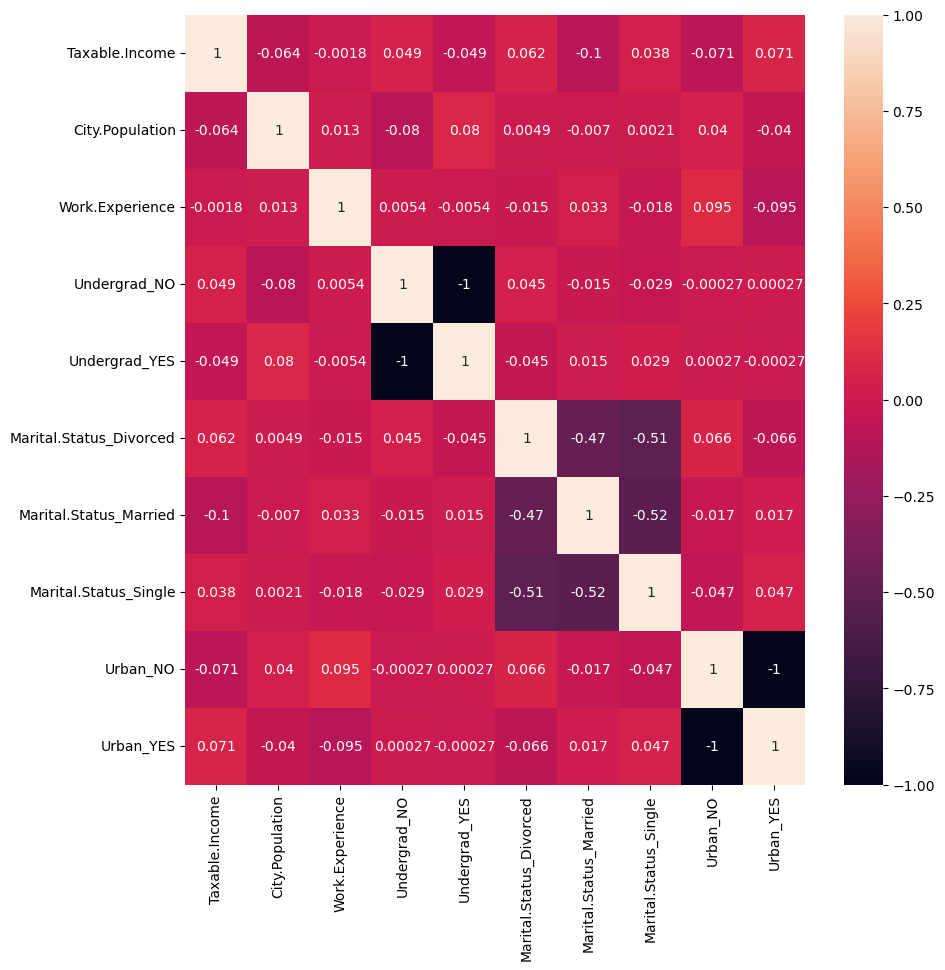

In [4]:
FC_Dataset_Dum = pd.get_dummies(FC_Dataset, columns = ['Undergrad','Marital.Status','Urban'])
corr = FC_Dataset_Dum.corr()
corr = FC_Dataset_Dum.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [5]:
FC_Dataset_Dum['Taxable.Income']=pd.cut(FC_Dataset_Dum['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [6]:
list(FC_Dataset_Dum.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [7]:
X = FC_Dataset_Dum.iloc[:,1:10]
y = FC_Dataset_Dum.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
pred_train = model.predict(x_train)

In [11]:
accuracy_score(y_train,pred_train)

1.0

In [12]:
confusion_matrix(y_train,pred_train)

array([[372,   0],
       [  0, 108]], dtype=int64)

In [13]:
pred_test = model.predict(x_test)

In [14]:
accuracy_score(y_test,pred_test)

0.7333333333333333

In [15]:
confusion_matrix(y_test,pred_test)

array([[82, 22],
       [10,  6]], dtype=int64)

In [16]:
FC_Dataframe = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
FC_Dataframe

,Actual,Predicted
416,good,good
490,good,good
598,good,good
552,good,good
378,good,good
...,...,...
216,good,good
207,risky,good
62,good,good
78,good,good


In [17]:
model.feature_importances_

array([0.60720458, 0.20514298, 0.05641301, 0.02885119, 0.02937582,
       0.00640425, 0.02483956, 0.02780938, 0.01395924])

In [18]:
Feature_Impor_Fraud = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [19]:
Feature_Impor_Fraud

,feature,importance
0,City.Population,0.607205
1,Work.Experience,0.205143
2,Undergrad_NO,0.056413
4,Marital.Status_Divorced,0.029376
3,Undergrad_YES,0.028851
7,Urban_NO,0.027809
6,Marital.Status_Single,0.024840
8,Urban_YES,0.013959
5,Marital.Status_Married,0.006404


*Company Dataset*

In [20]:
Company_Dataset = pd.read_csv("C:/Users/Dell/Downloads/Company_Data.csv")
Company_Dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
Company_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


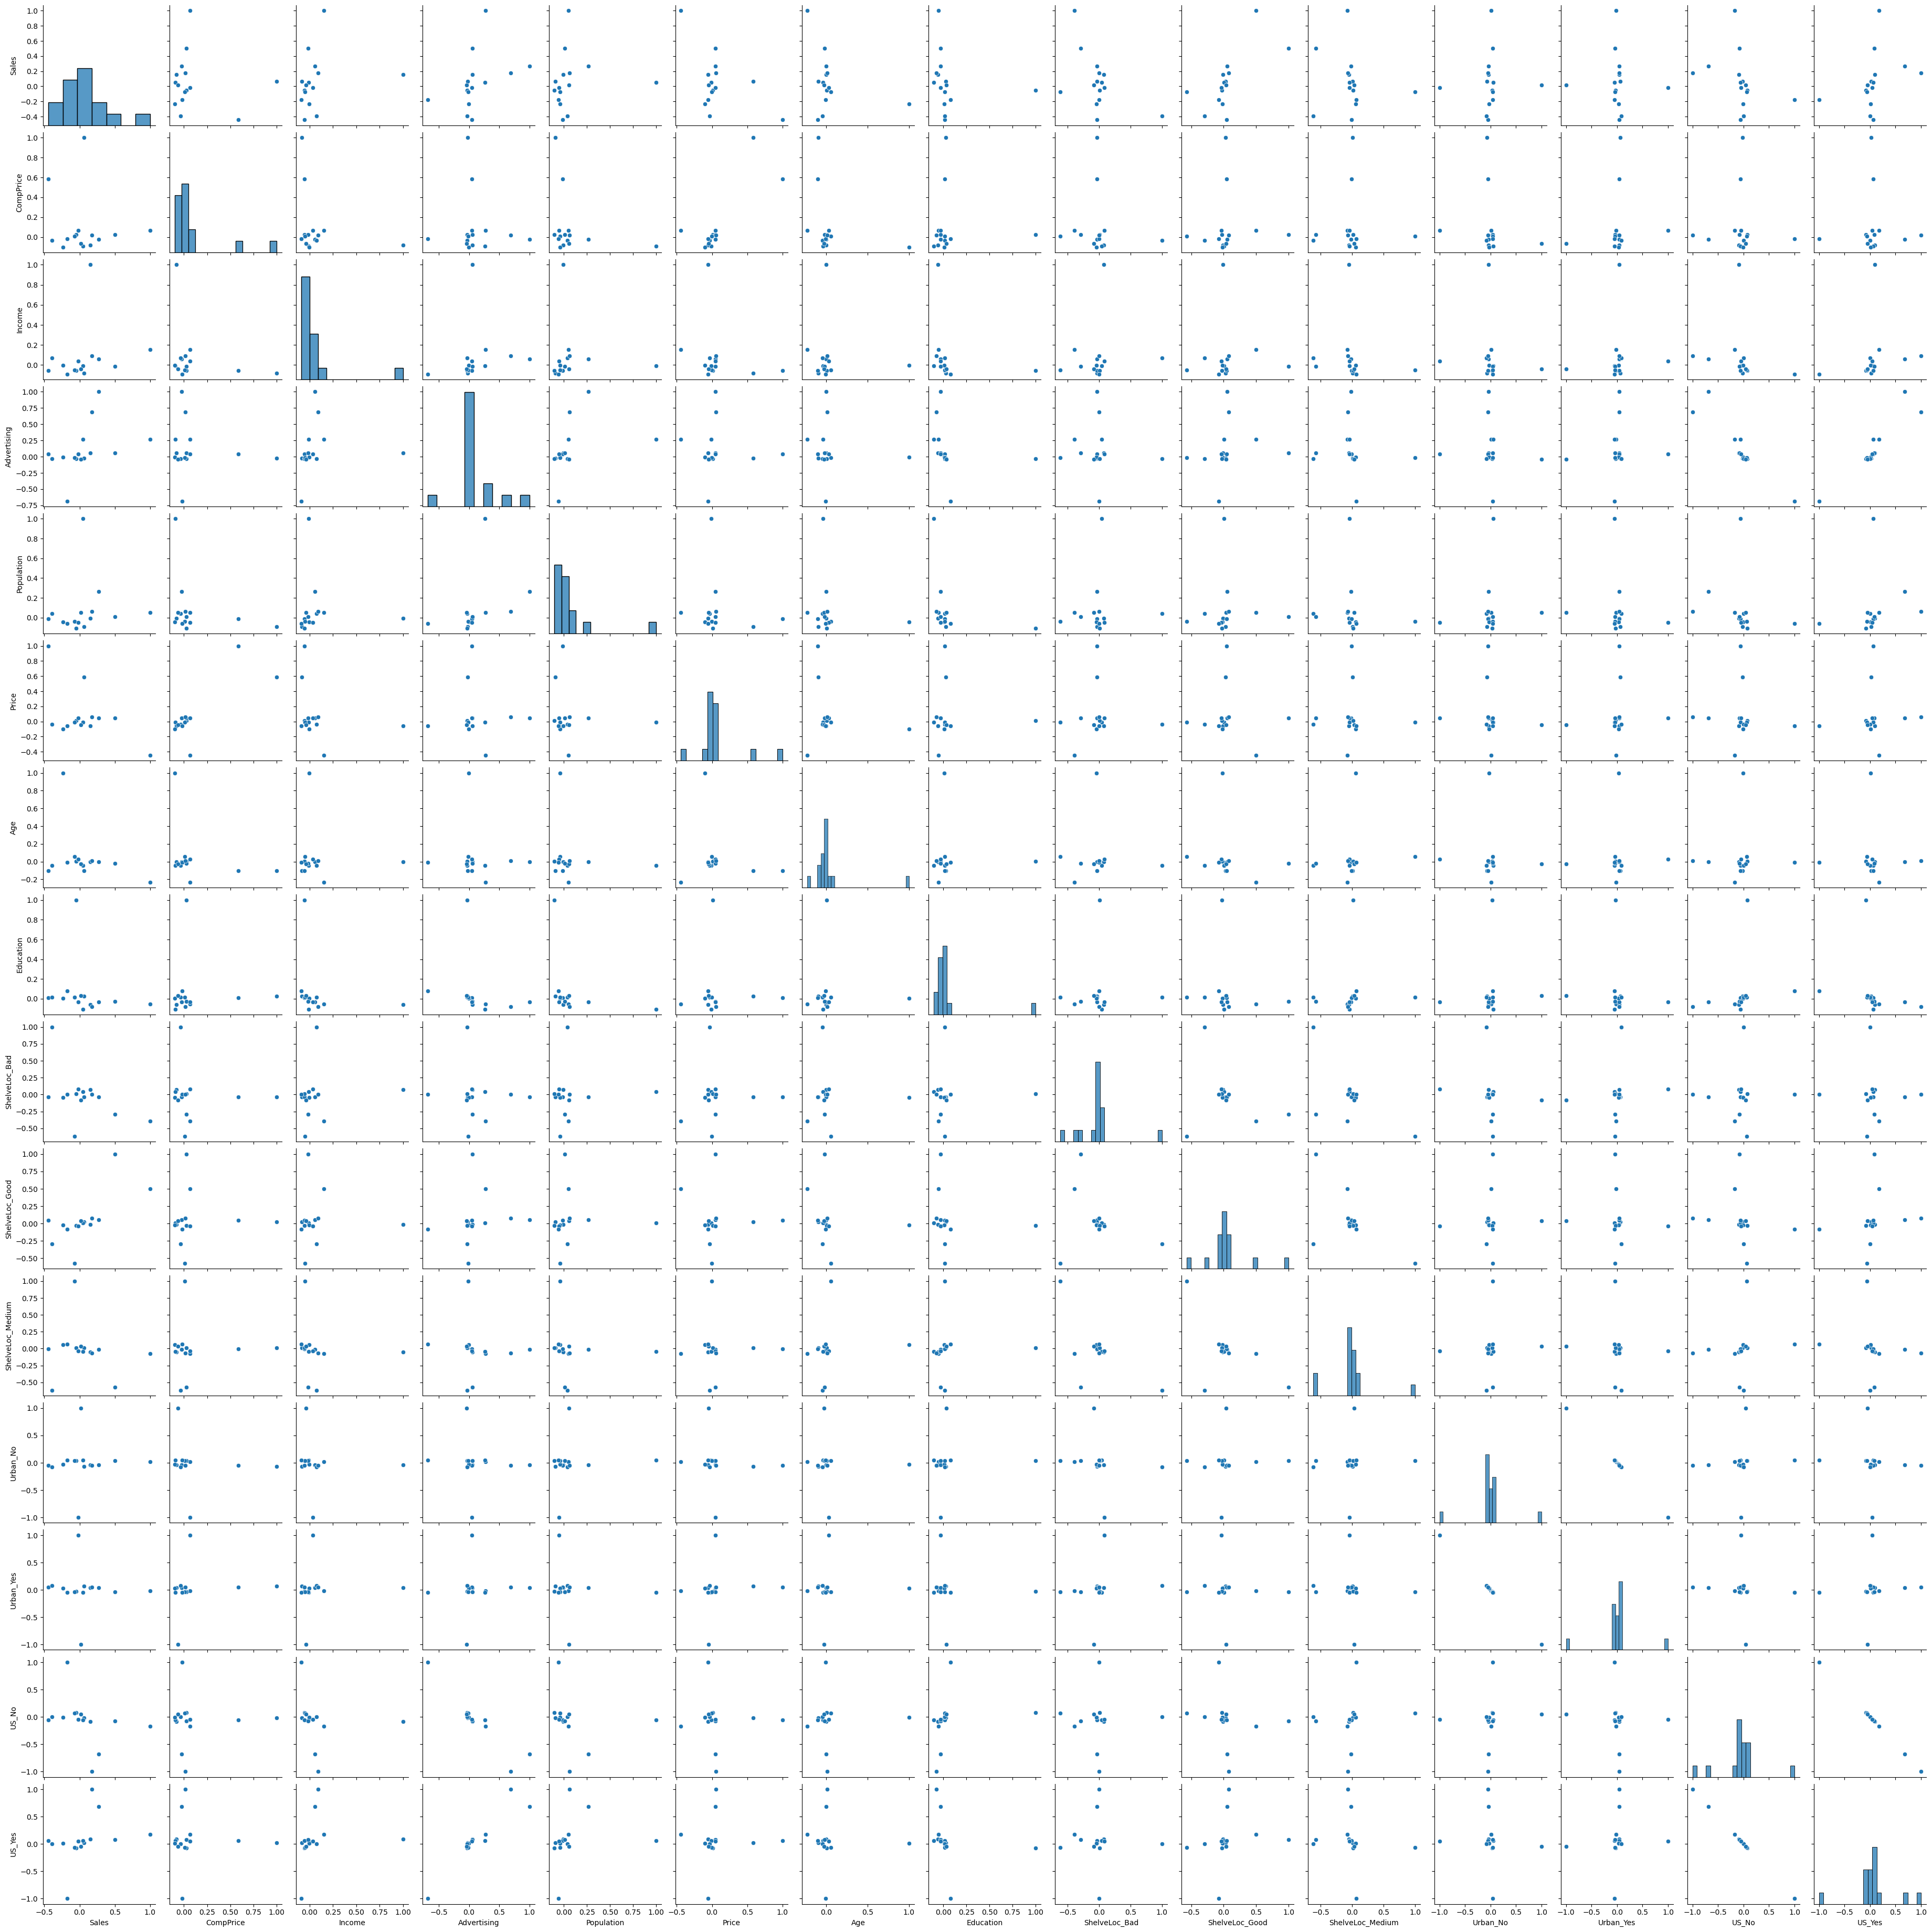

In [26]:
Company_Dataset_Dum = pd.get_dummies(Company_Dataset, columns = ['ShelveLoc','Urban','US'])
corr = Company_Dataset_Dum.corr()
corr = Company_Dataset_Dum.corr()
sns.pairplot(corr)

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Income'>

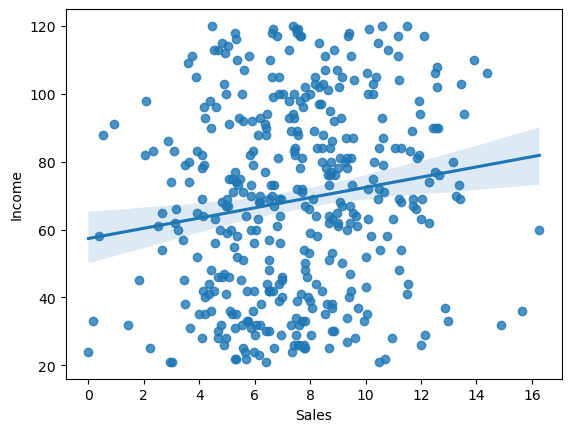

In [27]:
sns.regplot('Sales','Income', data=Company_Dataset_Dum)  

In [23]:
list(Company_Dataset_Dum.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [28]:
Company_Dataset_Dum["sales"]="small"
Company_Dataset_Dum.loc[Company_Dataset_Dum["Sales"]>7.49,"sales"]="large"
Company_Dataset_Dum.drop(["Sales"],axis=1,inplace=True)

In [29]:
X = Company_Dataset_Dum.iloc[:,0:14]
y = Company_Dataset_Dum.iloc[:,14]

In [30]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [32]:
model_Company = DT(criterion='entropy') 
model_Company.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
pred_train_Company = model_Company.predict(x_train)

In [36]:
Accu_Score_Company_train = accuracy_score(y_train,pred_train_Company)
Accu_Score_Company_train

1.0

In [37]:
pred_test_Company = model_Company.predict(x_test)

In [38]:
Accu_Score_Company_test = accuracy_score(y_test,pred_test_Company)
Accu_Score_Company_test

0.6875

In [40]:
df_Company = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test_Company})
df_Company

,Actual,Predicted
74,small,large
358,small,small
175,large,small
391,small,small
367,large,large
...,...,...
145,large,small
323,large,large
243,large,small
78,small,small


In [41]:
model.feature_importances_

array([0.15271271, 0.16159659, 0.09891669, 0.07088596, 0.24234205,
       0.10766103, 0.01014126, 0.00860927, 0.10416922, 0.00860927,
       0.02149386, 0.        , 0.        , 0.01286211])

In [42]:
Feature_Impor_Company = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [43]:
Feature_Impor_Company

,feature,importance
4,Price,0.242342
1,Income,0.161597
0,CompPrice,0.152713
5,Age,0.107661
8,ShelveLoc_Good,0.104169
2,Advertising,0.098917
3,Population,0.070886
10,Urban_No,0.021494
13,US_Yes,0.012862
6,Education,0.010141
